Втора лабораториска вежба по предметот Податочно рударство

Изработиле: Јана Митровска (181080) и Бојан Петрушевски (162012)

Податочно множество:

Тема: Дрва на одлучување


# **Reading the dataset**

In [9]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [10]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


# **Decision trees**

In [13]:
dt = DecisionTreeClassifier(criterion='entropy')

In [14]:
data_encoded = data.apply(LabelEncoder().fit_transform)
data_encoded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,1,83,3748,3160,6,328,71,8,3,398,3912
1,1111,0,125,1789,1589,42,844,67,8,91,310,1390
2,2222,0,68,1253,6200,60,707,62,5,76,336,7172
3,3333,0,127,3355,1788,75,476,60,4,78,47,3936
4,4444,0,61,3095,2924,75,97,59,4,121,294,138
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,7537,0,7759,1793,2487,67,635,56,8,97,310,6876
7783,7538,0,7761,2536,6474,28,675,66,6,109,312,889
7784,7539,0,7762,3748,4601,76,985,70,8,42,269,4197
7785,7540,1,7763,3748,140,1,1286,70,9,0,368,2823


In [15]:
X = data_encoded.drop(['type'], axis = 1)
Y = data_encoded.type.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [16]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
predicted = dt.predict(X_test)

In [18]:
dt.feature_importances_

array([0.00000000e+00, 1.59038266e-03, 0.00000000e+00, 1.75967576e-03,
       0.00000000e+00, 5.78994745e-04, 0.00000000e+00, 0.00000000e+00,
       9.91078848e-01, 2.21721967e-03, 2.77487943e-03])

In [19]:
result_data = pd.DataFrame({"actual":Y_test, "predicted":predicted})

In [20]:
result_data

,actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1553,1,1
1554,0,0
1555,0,0
1556,1,1


In [28]:
#1073 вредности биле 0 и се предвиделе како 0, 3 вредности биле 0 и се предвиделе како 1
#1 вредности биле 1 и се предвиделе како 0, 481 вредности биле 1 и се предвиделе како 1
confusion_matrix = pd.crosstab(result_data['actual'], result_data['predicted'], rownames={'Actual'},
                               colnames=['Predicted'])
print(confusion_matrix) 

Predicted     0    1
Actual              
0          1073    3
1             1  481


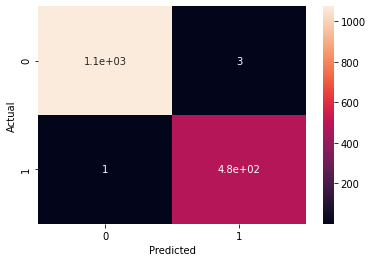

In [22]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [23]:
#Оваа метрика пресметува точност на подмножество. 
#Резултатот од тестот е 0.997 од максимална вредност 1. 
accuracy_score(result_data['actual'], result_data['predicted']) 

0.9974326059050064

In [24]:
#Покажува просечна точност на предвидениот резултат.
#Резултатот од тестот е 0.993 од максимална вредност 1.
precision_score(result_data['actual'], result_data['predicted']) 

0.993801652892562

In [25]:
#Го споредува односот помеѓу точните позитивни и лажните негативни. Со помош на оваа формула се пресметува tp / (tp + fn).
#Резултатот од тестот е 0.996 од максимална вредност 1.
recall_score(result_data['actual'], result_data['predicted'])

0.9979253112033195

In [26]:
#Резултатот Ф1 може да се толкува како пондериран просек на прецизност и отповикување.
#Резултатот од тестот е 0.996 од максимална вредност 1.
f1_score(result_data['actual'], result_data['predicted'])

0.9958592132505175

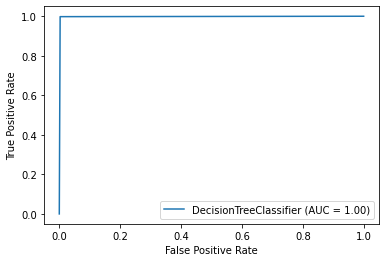

In [27]:
#Крива која ја покажува прецизноста на DecisionTreeClassifier 
plot_roc_curve(dt, X_test, Y_test)
plt.show()